In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras import metrics
from keras.models import load_model

from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA

Using TensorFlow backend.


Criação do modelo usando 4 anos e dados booleanos

In [2]:
train07091113 = pd.read_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\pred_4anos\train_0713_bool.csv')
train09111315 = pd.read_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\pred_4anos\train_0915_bool.csv')

In [3]:
pred11131517 = pd.read_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\pred_4anos\pred_1117_bool.csv')

In [4]:
train07091113_idebs = pd.DataFrame()
train09111315_idebs = pd.DataFrame()
train11131517_idebs = pd.DataFrame()
pred11131517_idebs = pd.DataFrame()

train07091113_idebs['Ideb2007'] = train07091113['Ideb2007']
train07091113_idebs['Ideb2009'] = train07091113['Ideb2009']
train07091113_idebs['Ideb2011'] = train07091113['Ideb2011']
train07091113_idebs['Ideb2013'] = train07091113['Ideb2013']

train09111315_idebs['Ideb2009'] = train09111315['Ideb2009']
train09111315_idebs['Ideb2011'] = train09111315['Ideb2011']
train09111315_idebs['Ideb2013'] = train09111315['Ideb2013']
train09111315_idebs['Ideb2015'] = train09111315['Ideb2015']

pred11131517_idebs['Ideb2011'] = pred11131517['Ideb2011']
pred11131517_idebs['Ideb2013'] = pred11131517['Ideb2013']
pred11131517_idebs['Ideb2015'] = pred11131517['Ideb2015']
pred11131517_idebs['Ideb2017'] = pred11131517['Ideb2017']

In [5]:
train07091113_target = train07091113[['Ideb2015']]
train07091113.drop(columns=['Ideb2015','Ideb2017'],inplace=True)

train09111315_target = train09111315[['Ideb2017']]
train09111315.drop(columns=['Ideb2007','Ideb2017'],inplace=True)

pred11131517.drop(columns=['Ideb2007','Ideb2009'],inplace=True)

In [7]:
Cod_Escolas = pred11131517['Cod_Escola_Completo']

In [8]:
list(train07091113.columns)

['Unnamed: 0',
 'in_comum_creche0',
 'in_comum_pre0',
 'in_comum_fund_ai0',
 'in_comum_fund_af0',
 'in_comum_medio_integrado0',
 'in_comum_medio_normal0',
 'in_comum_medio_medio0',
 'in_em_atividade0',
 'in_local_func_predio_escolar0',
 'in_local_func_salas_empresa0',
 'in_local_func_socioeducativo0',
 'in_local_func_unid_prisional0',
 'in_local_func_prisional_socio0',
 'in_local_func_templo_igreja0',
 'in_local_func_casa_professor0',
 'in_local_func_salas_outra_esc0',
 'in_predio_compartilhado0',
 'in_agua_filtrada0',
 'in_agua_rede_publica0',
 'in_agua_poco_artesiano0',
 'in_agua_cacimba0',
 'in_agua_fonte_rio0',
 'in_agua_inexistente0',
 'in_energia_rede_publica0',
 'in_energia_gerador0',
 'in_energia_outros0',
 'in_energia_inexistente0',
 'in_esgoto_rede_publica0',
 'in_esgoto_fossa0',
 'in_esgoto_inexistente0',
 'in_lixo_coleta_periodica0',
 'in_lixo_queima0',
 'in_lixo_joga_outra_area0',
 'in_lixo_recicla0',
 'in_lixo_enterra0',
 'in_lixo_outros0',
 'in_sala_diretoria0',
 'in_sal

In [10]:
train07091113.drop(columns=['Unnamed: 0','Cod_Escola_Completo','is_anosiniciais','is_anosiniciais0','is_anosiniciais0.1','is_anosiniciais0.2'],inplace=True)
train09111315.drop(columns=['Unnamed: 0','Cod_Escola_Completo','is_anosiniciais','is_anosiniciais0','is_anosiniciais0.1','is_anosiniciais0.2'],inplace=True)

pred11131517.drop(columns=['Unnamed: 0','Cod_Escola_Completo','is_anosiniciais','is_anosiniciais0','is_anosiniciais0.1','is_anosiniciais0.2'],inplace=True)

Criação do modelo 07091113

In [68]:
X_train_07091113, X_test_07091113, y_train_07091113, y_test_07091113 = train_test_split(train07091113,train07091113_target,test_size=0.2,random_state=932)
model_07091113 = Sequential()
n_cols = X_train_07091113.shape[1]
model_07091113.add(Dense(63,activation='relu',input_shape = (n_cols,)))
model_07091113.add(Dense(35,activation='relu',input_shape = (n_cols,)))
#model_07091113.add(Dense(13,activation='relu',input_shape = (n_cols,)))
model_07091113.add(Dense(1))
early_stopping_monitor = EarlyStopping(patience=2)

In [69]:
model_07091113.compile(optimizer='adam',loss='mean_squared_error')
model_07091113.fit(X_train_07091113,y_train_07091113,validation_split = 0.2,epochs=100,callbacks=[early_stopping_monitor],batch_size=30)

Train on 21189 samples, validate on 5298 samples
Epoch 1/100
21189/21189 [==============================] - 3s 120us/step - loss: 0.5973 - val_loss: 0.3123
Epoch 2/100
21189/21189 [==============================] - 2s 98us/step - loss: 0.2741 - val_loss: 0.2763
Epoch 3/100
21189/21189 [==============================] - 2s 101us/step - loss: 0.2705 - val_loss: 0.2929
Epoch 4/100
21189/21189 [==============================] - 2s 97us/step - loss: 0.2713 - val_loss: 0.2871


In [18]:
model_07091113.evaluate(X_test_07091113,y_test_07091113)

6622/6622 [==============================] - 0s 27us/step


0.27803787267737357

In [73]:
model_07091113.save(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\models_keras\model_07091113_bool.h5')

Criação do modelo 09111315

In [54]:
X_train_09111315, X_test_09111315, y_train_09111315, y_test_09111315 = train_test_split(train09111315,train09111315_target,test_size=0.1,random_state=932)
model_09111315 = Sequential()
n_cols = X_train_09111315.shape[1]
model_09111315.add(Dense(35,activation='relu',input_shape = (n_cols,)))
model_09111315.add(Dense(13,activation='relu',input_shape = (n_cols,)))
#model_09111315.add(Dense(13,activation='relu',input_shape = (n_cols,)))
model_09111315.add(Dense(1))
early_stopping_monitor = EarlyStopping(patience=2)

In [55]:
model_09111315.compile(optimizer='adam',loss='mean_squared_error')
model_09111315.fit(X_train_09111315,y_train_09111315,validation_split = 0.2,epochs=100,callbacks=[early_stopping_monitor],batch_size=30)

Train on 23838 samples, validate on 5960 samples
Epoch 1/100
23838/23838 [==============================] - 3s 106us/step - loss: 0.6947 - val_loss: 0.2870
Epoch 2/100
23838/23838 [==============================] - 2s 87us/step - loss: 0.2751 - val_loss: 0.2589
Epoch 3/100
23838/23838 [==============================] - 2s 85us/step - loss: 0.2670 - val_loss: 0.2583
Epoch 4/100
23838/23838 [==============================] - 2s 99us/step - loss: 0.2614 - val_loss: 0.2600
Epoch 5/100
23838/23838 [==============================] - 2s 96us/step - loss: 0.2617 - val_loss: 0.2526
Epoch 6/100
23838/23838 [==============================] - 2s 85us/step - loss: 0.2602 - val_loss: 0.2601
Epoch 7/100
23838/23838 [==============================] - 2s 86us/step - loss: 0.2624 - val_loss: 0.2599


In [21]:
model_09111315.evaluate(X_test_09111315,y_test_09111315)

3311/3311 [==============================] - 0s 32us/step


0.2697940766541341

In [62]:
model_09111315.save(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\models_keras\model_09111315_bool.h5')

In [50]:
pd.DataFrame(pred11131517).to_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\dados_predicao\pred11131517_bool.csv')

Output

In [70]:
pred_07091113 = pd.Series(data=model_07091113.predict(pred11131517)[:,0])
pred_09111315 = pd.Series(data=model_09111315.predict(pred11131517)[:,0])

In [23]:
Ideb2015 = 5.131053 #train07091113_target.mean()
Ideb2015 = 5.352906 #train09111315_target.mean()

In [24]:
cte = (5.352906/5.131053)

In [71]:
output = pd.DataFrame()
output['pred_07091113_bool'] = pred_07091113
output['pred_09111315_bool'] = pred_09111315
output['ensemble_bool'] = ((output['pred_07091113_bool']+output['pred_09111315_bool'])/2)
output['Ideb2017'] = pred11131517['Ideb2017'] 
output['dif'] = output['ensemble_bool'] - output['Ideb2017'] 
output['Cod_Escola'] = Cod_Escolas

In [72]:
output.describe()

,pred_07091113_bool,pred_09111315_bool,ensemble_bool,Ideb2017,dif,Cod_Escola
count,33109.000000,33109.000000,33109.000000,33109.000000,33109.000000,3.310900e+04
mean,5.456384,5.298024,5.377246,5.352974,0.024258,3.302644e+07
std,0.979884,0.983843,0.970249,1.101314,0.290985,9.648031e+06
min,2.426892,2.032262,2.229577,1.600000,-2.015444,1.100026e+07
25%,4.739569,4.571565,4.661839,4.600000,-0.163352,2.703266e+07
50%,5.428378,5.264211,5.342485,5.300000,0.021852,3.304017e+07
75%,6.187819,6.033667,6.110089,6.200000,0.211222,4.105236e+07
max,9.032299,8.957470,8.994884,9.600000,1.982548,5.301462e+07


In [45]:
output_sort_dif = output.sort_values(['dif'],ascending=False)
output_sort_dif


,pred_07091113_bool,pred_09111315_bool,ensemble_bool,Ideb2017,dif,Cod_Escola
31101,3.797678,3.605873,3.701775,1.9,1.801775,33100659
15970,4.069562,4.030688,4.050125,2.3,1.750125,13055810
16840,4.895372,3.675582,4.285477,2.6,1.685477,26048841
8159,4.599544,4.805861,4.702703,3.1,1.602703,25085883
3354,4.491616,4.306966,4.399291,2.8,1.599291,25117866
285,3.431833,3.360075,3.395954,1.8,1.595954,15136060
11274,4.812988,4.917384,4.865186,3.3,1.565186,35054963
18825,6.585049,6.140632,6.362841,4.8,1.562841,33084734
16049,4.701202,4.619831,4.660517,3.1,1.560517,13072030
3618,5.124594,4.966519,5.045557,3.5,1.545557,26146916


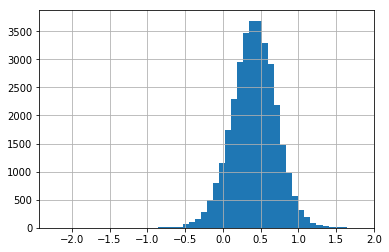

In [35]:
output['dif'].hist(bins=50)

In [46]:
best_esc_pred4 = output_sort_dif.head(1000)

In [48]:
best_esc_pred4.to_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\best_schools\best_esc_pred4(sem_ideb)_bool.csv')